# Kolokvij 2

- Datum: 1. lipnja, 2021.
- Ukupno bodova: 100

Svoje odgovore i kod pišete u ovu bilježnicu. 

##### Ime i prezime: Nikola Šarić

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_regression
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.mixture import GaussianMixture

#import torch
#import torch.nn as nn

---
---

## 1. Zadatak (20)
_Grupiranje podataka_

---


1. Zadan je skup podataka  $X=\{x_i \in \mathbb{R}^n: i=1,\cdots,m\}$, pri čemu podatke želimo grupirati u $k\geq 1$ klastera. 
    1. Definirajte kako općenito izgleda kriterijska funkcija za ovaj problem. 
    2. Kako se definira globalno optimizacijski problem traženja najbolje k-particije ako koristimo $\ell_1$-metričku funkciju $d_1:\mathbb{R}^n\times \mathbb{R}^n \rightarrow \mathbb{R}_+$? 
    3. Što je najbolji reprezentant skupa podataka $X$ ako se koristi  $\ell_1$-metrička funkcija?
2. Zadan je skup podataka $\{(1,1),(1,6),(2,3),(2,7),(4,2),(5,7),(6,8),(7,6)\}$. Uz početku 3-particiju $\Pi_0 = \{ \{(1,1),(2,3),(4,2)\},\{(1,6),(2,7),(5,7)\}, \{(6,8),(7,6)\}\}$ pronađite optimalnu particiju skupa ako se koristi $\ell_1$-metrička funkcija. 
3. Pokrenite kod za učitavanje podataka `zadatak-1.npy`. Zatim nadopunite kod koji pokreće k-means algoritam nekoliko puta s različitim izborima $k$ tako da u svakoj iteraciji grafički prikažete centre optimalne particije i izračunate *CH* indekse. 
    1. Koji broj klastera *k* biste izabrali kao primjeren? 
    2. Objasnite kako se kreću vrijednosti CH indeksa na ovom primjeru. 

### 1.

A)

- $\mathcal{F} : \mathcal{P}(X,k) \rightarrow \mathbb{R}_+$ (*suma udaljenosti do centra klastera po svim klasterima*)
- $\mathcal{F}(\Pi) = \sum\limits_{j=1}^{k}\sum\limits_{x^{(i)}\in\pi_j}d(c_j,x^{(i)})$
---
B)

- minimizirati po $ \Pi \in \mathcal{P}(X,k)$
- (globalno) optimalna particija je $\Pi ^* \in \arg\min\limits_{\Pi \in \mathcal{P}(X,k) }{\mathcal{F}(\Pi)}$ 
---

C)
- U slučaju $\ell_1$ kvazimetrike, najbolji reprezentant je medijan točaka 

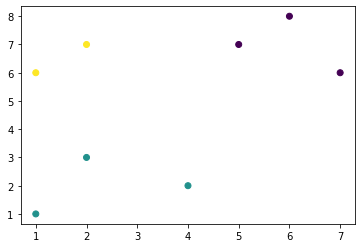

In [8]:
# Podzdatak 2
X = np.array([(1,1),(1,6),(2,3),(2,7),(4,2),(5,7),(6,8),(7,6)])
kmeans = KMeans(n_clusters=3).fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)

### Podzadatak 2
Centri klastera su $c_1 = (2, 2), c_2 = (2, 7), c_3 = (7, 8)$.

U jednoj iteraciji računanja novih klastera i centara algoritam konvergira.

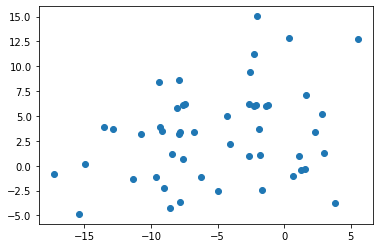

In [9]:
# 3. 
X = np.load('zadatak-1.npy')
plt.scatter(X[:,0], X[:,1])
plt.show()

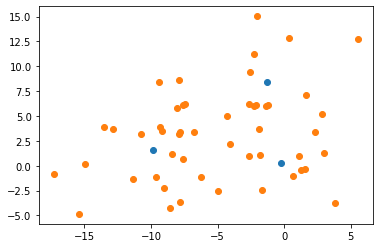

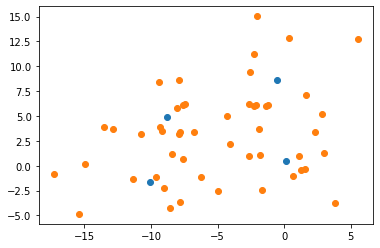

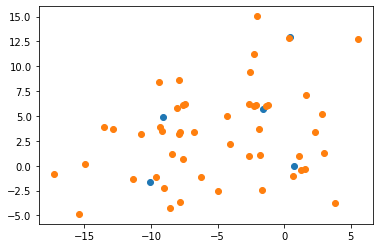

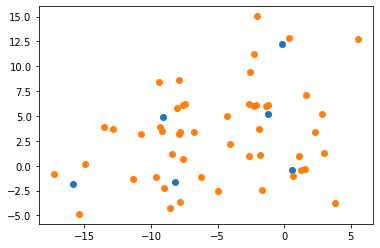

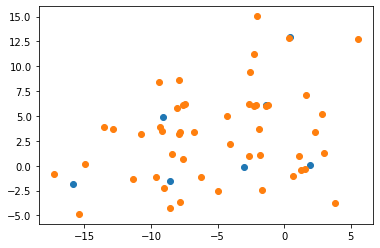

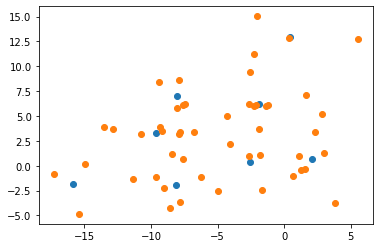

In [10]:
ch_scores = []
for i in range(3,9):
    kmeans = KMeans(n_clusters=i).fit(X)
    # Vaš kod ...
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
    plt.scatter(X[:,0], X[:,1])
    plt.show()

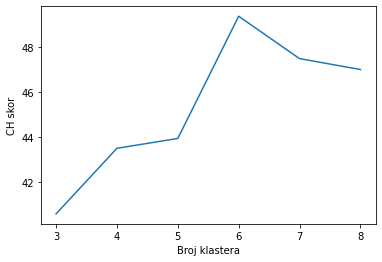

In [11]:
plt.plot(range(3, 9), ch_scores)
plt.xlabel('Broj klastera')
plt.ylabel('CH skor')
plt.show()

### 3.

A)

- Odabrao bih 6 klastera
---
B)

- Vrijednost CH indeksa najveca je za 6 klastera. 

<br>

---
---

## 2. Zadatak (15)
*Gaussova miješana distribucija*

---

Neka su zadane dvije slučajne varijable $Y_1 \sim \mathcal{N}(\mu_1, \sigma_1^2)$ i $Y_2 \sim \mathcal{N}(\mu_2, \sigma_2^2)$ koje modeliraju površinu stanova ($Y_1$) tj. površinu kuća ($Y_2$). 

1. Imamo zadane podatake $x_1, x_2, \cdots, x_m$ među kojima su nam pomiješane površine stanova i kuća. Želimo definirati slučajnu varijablu $X$ koja će nam općenito modelirati površinu nekretnine. Napišite kako će u tom slučaju izgledati funkcija gustoće slučajne varijable $X$. 
2. Koji su nam nepoznati parametri u distribuciji slučajne varijble $X$? Kako ih određujemo?
2. Pokrenite kod za učitavanje podataka `zadatak-2.npy`. Pomoću ugrađene klase `GaussianMixture` procjenite parametre Gausove miješane distribucije. 
    1. Ispišite dobivene procjene za parametre. 


## Rješenje
### Podzadatak 1
Ako $X$ modeliramo kao miješanu distribuciju, funkcija gustoće od $X$ će biti konvkesna kombinacija funkcija gustoća od $Y_1$ i $Y_2$, to jest
$$
f_X(x) = \sum_{i=1}^2p_if_{Y_i}(x),
$$
gdje je $p_i \geq 0$ za sve $i$ te $p_1 + p_2 = 1$.

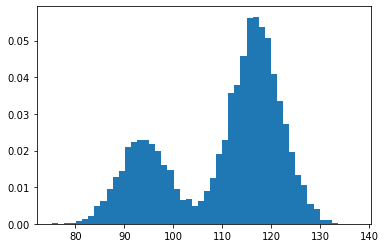

p: [0.29905581 0.70094419]
mu: [ 93.96992467 117.0284137 ]
sigma^2: [25.7265239 25.8796671]
True
2
-3.626138766979848


In [3]:
# 2. 
#---- Ne mijanjaj kod ----#
X = np.load('zadatak-2.npy')
plt.hist(X, bins=50, density=True)
plt.show()
#------------------------#

model = GaussianMixture(n_components=2, tol=0.001, max_iter=100, n_init=1, init_params='kmeans')
model.fit(X.reshape(-1, 1))

print(f'p: {model.weights_.squeeze()}')
print(f'mu: {model.means_.squeeze()}')
print(f'sigma^2: {model.covariances_.squeeze()}')
print(model.converged_)
print(model.n_iter_)
print(model.lower_bound_)

In [12]:
# Vaš kod 3.
model = GaussianMixture(n_components=2)
model.fit(X)

print(f'TEZINE\n{model.weights_}\nMU\n{model.means_}\nsigma**2\n{model.covariances_}')

TEZINE
[0.55576889 0.44423111]
MU
[[-8.85045608  2.03785692]
 [-0.09371613  4.54825666]]
sigma**2
[[[12.8342717   3.88583464]
  [ 3.88583464 14.0103119 ]]

 [[ 6.77700668 -1.49801196]
  [-1.49801196 25.78760252]]]


<br>

---
---
## 3. Zadatak (5)
--- 

Model linearne regresije možemo probabilistički interpretirati kao $Y = \theta \cdot X + \epsilon$ 
1. Koja se pretpostavka uobičajeno stavi na šum $\epsilon$?
2. Kakva je distribucija slučajne varijable $Y$?
4. U ovisnosti o kojim parametrima optimiziramo funkciju maksimalne vjerodostojnosti? 


## Rješenje
### Podzadatak 1
U modelu linearne regresije pretpostavljamo da je šum normalno distribuiran s očekivanjem 0 i varijancom $\sigma^2$.

### Podzadatak 2
$Y$ i $X$ su korelirane.

### Podzadatak 3
Funkciju maksimalne vjerodostojnosti optimiziramo po parametru $\theta$.

<br>

---
---

## 4. Zadatak (10)


1. Neuronska mreža s 2 sloja i pet neurona u svakom sloju ima ukupno $60$ parametara (težine na bridovima + bias). 
    - da
    - ne
    
<img src="zadatak-4.png" width="70%">

2. Aktivacijske funkcije u svim slojevima možemo postaviti na identitetu tj. $f(x)=x$
    - da
    - ne
3. Rješavate problem klasifikacije slika cvijeća na *ruže*, *tratinčice* i *maslačke*. Koliko neurona ćete imati u završnom sloju? Koju aktivacijsku funkciju ćete primijeniti u završnom sloju? Napišite definiciju te aktivacijske funkcije koju ćete primijeniti. 

In [ ]:
### Vaš odgovor
 #1.) NE
 #2.) DA

### Podzadatak 3
Mreža u završnom sloju ima tri neurona, po jedan za svaku klasu.

U završnom sloju se može primijeniti bilo koja aktivacijska funkcija, ali za ikakvo učenje je poželjno koristiti softmax funkciju.

Softmax funkcija je definirana kao $f : \mathbb{R}^n \to \mathbb{R}^n$, 
$$
f(x)_i = \frac{\exp{x_i}}{\sum_{k=1}^n\exp{x_i}}
$$

---
## 5. Zadatak (15)
---

Zadana je neuronska mreža kao na slici koja riješava problem binarne klasifikacije (0,1) i naučene težine $w^{(1)}, w^{(2)}, w^{(3)}$. Neuronska mreža u svakom sloju ima sigmoid aktivacijsku funkciju. 

<img src="zadatak-5.png"></img>

1. Napišite izraz za računanje gradijenta $\frac{\partial J}{\partial w_{21}^{(2)}}$ ako je zadana funkcija $$J(\theta) = - \sum\limits_{i=1}^{m} [y^{(i)}\log{(\hat{y}^{(i)}) + (1-y^{(i)})\log{(1-\hat{y}^{(i)}})}],$$ gdje je $y^{(i)}$ pripadna oznaka podatka, a $\hat{y}^{(i)}$ predikcija. 
[Napomena: nije potrebno raspisivati derivaciju $\sigma'$]
2. Napravite propagaciju unaprijed za podatak $x=5$. Ispišite vrijednosti u međuslojevima $a^{(1)}, a^{(2)}$. Koja je vjerojatnost da je podatak $x=5$ klase 1?

## Rješenje
### Podzadatak 1
U svakom neuronu koristimo oznaku $a_i^{(j)} = \sigma(z_i^{(j)})$, gdje je $z$ vrijednost dobivena kao produkt težina i prethodnog neurona.
Raspisivanjem se dobije
$$
\frac{\partial{J}}{\partial{w_{21}^{(1)}}} = \frac{\partial{J}}{\partial{a_{1}^{(3)}}} \frac{\partial{a_{1}^{(3)}}}{\partial{z_{1}^{(3)}}} \frac{\partial{z_{1}^{(3)}}}{\partial{a_{2}^{(2)}}} \frac{\partial{a_{2}^{(2)}}}{\partial{z_{2}^{(2)}}} \frac{\partial{z_{2}^{(2)}}}{\partial{w_{21}^{(2)}}} 
$$

In [24]:
# ---------------------------
# Ovaj kod ne mijenjajte
w_1 = np.array([[-0.8,0.7]])
w_2 = np.array([[2.1,-2],[1.5,3]])
w_3 = np.array([[0.6,-0.7]])

x = np.array([[5]])
# ---------------------------

def tanh(x):
    return ((np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x)) )

def relu(x):
    return np.maximum(0,x)

def sigmoid(x):
    return 1/ (1 + np.exp(-x))

z1 = np.dot(w_1.T, x) # isti kurac ko @
a1 = sigmoid(z1)

z2 = np.dot(w_2.T, a1)
a2 = sigmoid(z2)

z3 = np.dot(w_3, a2)
a3 = sigmoid(z3)
print(f'Forward propagacija: {a3[0,0]}')

Forward propagacija: 0.4569401185026297


---
---
## 6. Zadatak (20)
RNN

---
---
 Pretpostavite da vam je zadan problem *Prepoznavanje entiteta*, u kojem za svaku riječ (entitet) u rečenici morate odrediti pripada li klasi **O** (Osoba), **L** (Lokacija), **R**(Razno). Podaci koji su vam dostupni su označeni tekstovi, npr. <br>
<center>$\underbrace{Dobriša}_{\text{O}} \;\underbrace{Cesarić}_{\text{O}} \; \underbrace{je}_{\text{R}} \; \underbrace{rođen}_{\text{R}} \; \underbrace{u}_{\text{R}} \; \underbrace{Požegi}_{\text{L}}.$</center>
Osim riječi i njihovi oznaka, na raspolaganju imate za svaku riječ  i njena lingivistička svojstva (vrsta riječi, ortografija, piše li se velikim slovom). 

1. Skicirajte arhitekturu RNN s kojom ćete prepoznavati entitete u tekstu, tj. na temelju riječi i njenih lingvističkih svojstava odrediti pripada li klasi O,L ili R.
2. Napišite koje su varijable u vašem modelu. Napišite formule računanja funkcije jedne RNN ćelije (cell).

## Rješenje
### Podzadatak 1
Jedna moguća arhitektura niz riječi preslikava u skrivena stanja, na temelju kojih radi klasifikaciju.
Skriveno stanje $h_t$ (dobiveno iz riječi $x_t$ i skrivenog stanja $h_{t-1}$) preslikavamo u 3-dimenzionalni vektor na koji djelujemo softmax funkcijom.

Drugi način je promatrati svaku riječ posebno i proslijeđivati takve nizove mreži jedan po jedan.

Primjerice, ako je početno slovo riječi veliko, onda se vjerojatno radi o osobi ili lokaciji.
Ako je zadnje slovo a ili ć, onda se vjerojatno radi o ženskom imenu ili nekom prezimenu. Može se smisliti još puno takvih pravila. 

### Podzadatak 2
Za ovakav model možemo koristiti neki jednostavan rekurentni model s $\tanh$ aktivacijama. 

 - Jedan skup parametara dolazi iz funkcije koja računa nova skrivena stanja: $h_t = W_1[x_t; h_{t-1}]$
 - Jedan skup parametara dolazi iz preslikavanja skrivenih stanja u izlaze: $o_t = W_2h_t$